In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles 

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [4]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [7]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [8]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=callback)

Epoch 1/500


3/3 [==============================] - 2s 141ms/step - loss: 0.6903 - accuracy: 0.4750 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6885 - accuracy: 0.4875 - val_loss: 0.6982 - val_accuracy: 0.4500
Epoch 3/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6868 - accuracy: 0.5375 - val_loss: 0.7018 - val_accuracy: 0.4500
Epoch 4/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6867 - accuracy: 0.5125 - val_loss: 0.7058 - val_accuracy: 0.4000
Epoch 5/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6850 - accuracy: 0.5500 - val_loss: 0.7069 - val_accuracy: 0.4000
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6843 - accuracy: 0.5500 - val_loss: 0.7074 - val_accuracy: 0.4000
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6835 - accuracy: 0.5500 - val_loss: 0.7083 - val_accuracy: 0.4000
Epoch 8/500
3/3 [

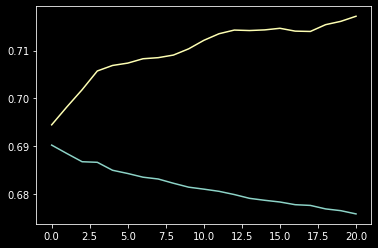

In [9]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='train')